# For discussion

# Quenches vs max current plot

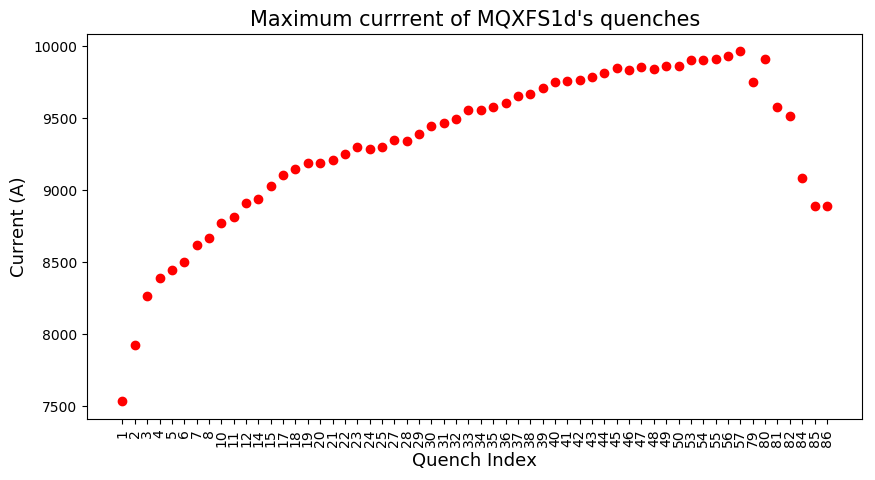

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcdefaults()
fig, ax = plt.subplots(figsize = (10,5))

data = pd.read_csv('MDPCT1b-all-results.csv')

ramp_names = [x[5:] for x in list(data.iloc[:,0])]
max_current = list(data.iloc[:,5])
x_pos = np.arange(len(ramp_names))

ax.scatter(x_pos, max_current, color = 'red')

#ax.axvline(2.5, color = "blue", ls = "--")
#ax.text(2, 17800, s = 'Thermal Cycle', color = 'blue', rotation = 90)

ax.set_xticks(x_pos)
ax.set_xticklabels(ramp_names)
plt.xticks(rotation=90)
ax.set_ylabel('Current (A)', fontsize = 13)
ax.set_xlabel('Quench Index', fontsize = 13)
ax.set_title("Maximum currrent of MQXFS1d's quenches", fontsize = 15)

#plt.savefig("foo.pdf", bbox_inches='tight')
plt.show()

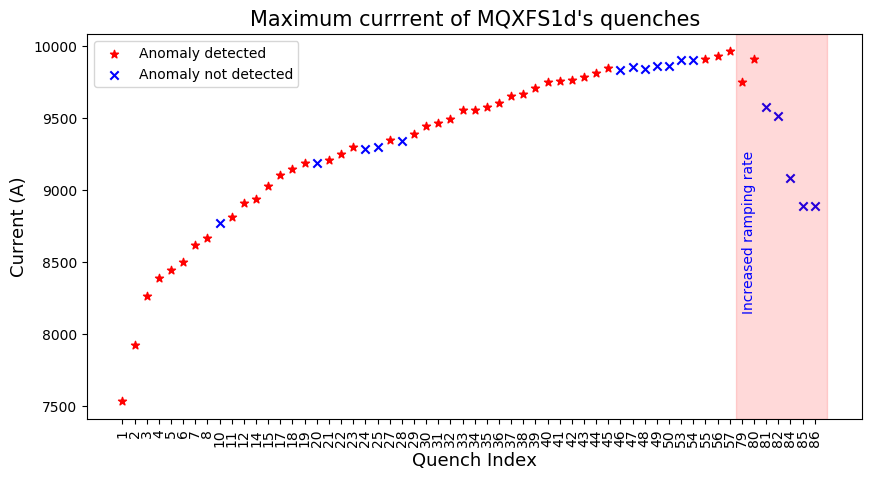

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcdefaults()
fig, ax = plt.subplots(figsize = (10,5))

data = pd.read_csv('MDPCT1b-all-results.csv')

ramp_names = [x[5:] for x in list(data.iloc[:,0])]
max_current = np.asarray(data.iloc[:,5])
x_pos = np.arange(len(ramp_names))

#plot triggered and non triggered point separately
x_pos_triggered = x_pos[data.iloc[:,1] == 'yes']
max_current_triggered = max_current[data.iloc[:,1] == 'yes']

x_pos_silent = x_pos[data.iloc[:,1] == 'no']
max_current_silent = max_current[data.iloc[:,1] == 'no']

ax.scatter(x_pos_triggered, max_current_triggered, marker = '*', color = 'red', label = 'Anomaly detected')
ax.scatter(x_pos_silent, max_current_silent, marker = 'x', color = 'blue',label = 'Anomaly not detected')

#Color region with increased ramping rate
ax.axvspan(50.5, 58, alpha=0.15, color='red')
ax.text(51, 9200, s = 'Increased ramping rate', color = 'blue', rotation = 90)

ax.set_xticks(x_pos)
ax.set_xticklabels(ramp_names)
plt.xticks(rotation=90)
ax.set_ylabel('Current (A)', fontsize = 13)
ax.set_xlabel('Quench Index', fontsize = 13)
ax.set_title("Maximum currrent of MQXFS1d's quenches", fontsize = 15)
plt.legend(loc='best')

#plt.savefig("foo.pdf", bbox_inches='tight')
plt.show()

# For paper

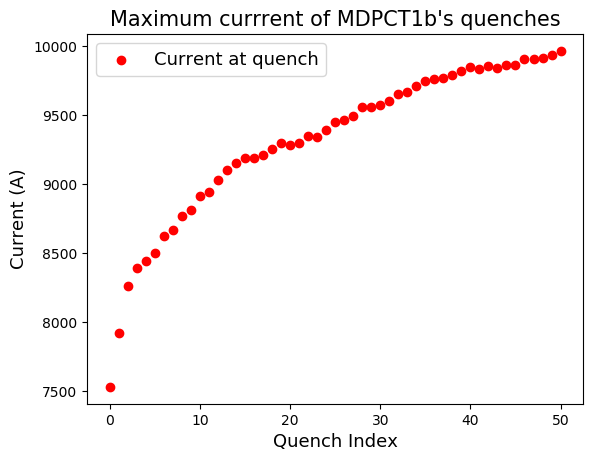

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcdefaults()
fig, ax = plt.subplots()

data = pd.read_csv('MDPCT1b-all-results.csv')

ramp_names = [x[5:] for x in list(data.iloc[:,0][:-7])]
max_current = list(data.iloc[:,5][:-7])
x_pos = np.arange(len(ramp_names))

ax.scatter(x_pos, max_current, color = 'red', label = 'Current at quench')

#Color region with increased ramping rate
#ax.axvspan(50.5, 58, alpha=0.15, color='red')
#ax.text(51, 9200, s = 'Increased ramping rate', color = 'royalblue', rotation = 90)


ax.set_ylabel('Current (A)', fontsize = 13)
ax.set_xlabel('Quench Index', fontsize = 13)
ax.set_title("Maximum currrent of MDPCT1b's quenches", fontsize = 15)


plt.legend(loc = 'best', fontsize = 13)
plt.savefig("MDPCT1b_max_current.pdf", bbox_inches='tight')
plt.show()

## Detected quenches plot

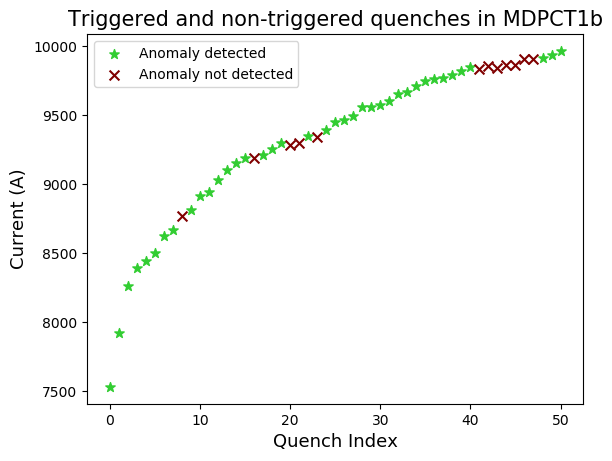

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcdefaults()
fig, ax = plt.subplots()

data = pd.read_csv('MDPCT1b-all-results.csv')

ramp_names = [x[5:] for x in list(data.iloc[:,0][:-7])]
max_current = np.asarray(list(data.iloc[:,5][:-7]))
x_pos = np.arange(len(ramp_names))

x_pos_triggered = x_pos[data.iloc[:,1][:-7] == 'yes']
max_current_triggered = max_current[data.iloc[:,1][:-7] == 'yes']

x_pos_silent = x_pos[data.iloc[:,1][:-7] == 'no']
max_current_silent = max_current[data.iloc[:,1][:-7] == 'no']

ax.scatter(x_pos_triggered, max_current_triggered, marker = '*', s = 50, color = 'limegreen', label = 'Anomaly detected')
ax.scatter(x_pos_silent, max_current_silent, marker = 'x', s = 50, color = 'maroon',label = 'Anomaly not detected')

#Color region with increased ramping rate
#ax.axvspan(50.5, 58, alpha=0.15, color='red')
#ax.text(51, 9200, s = 'Increased ramping rate', color = 'royalblue', rotation = 90)

ax.set_ylabel('Current (A)', fontsize = 13)
ax.set_xlabel('Quench Index', fontsize = 13)
ax.set_title("Triggered and non-triggered quenches in MDPCT1b", fontsize = 15)
plt.legend(loc='best')

plt.savefig("MDPCT1b_trigger_quench.pdf", bbox_inches='tight')
plt.show()

## triggered time distribution

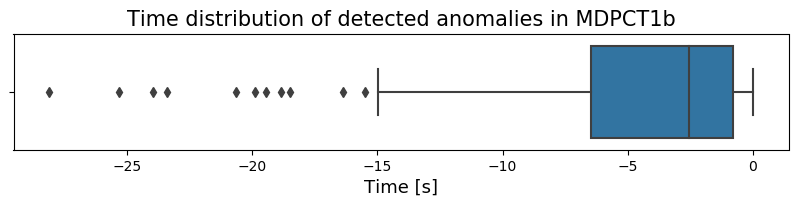

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcdefaults()
fig, ax = plt.subplots(figsize = [10,1.5])

data = pd.read_csv('MDPCT1b-all-results.csv').iloc[:-7]

all_trigger_points = []


for i in range(data.shape[0]):
    if data['triggered'][i] == 'yes':
        ramp_anomaly = list(map(float,data['trigger_points'][i][1:-1].split(', ')))
        all_trigger_points.extend(ramp_anomaly)


ax = sns.boxplot(x = all_trigger_points)
ax.set_xlabel('Time [s]', fontsize = 13)
ax.set_title("Time distribution of detected anomalies in MDPCT1b", fontsize = 15)
plt.savefig("MDPCT1b_time_dist.pdf", bbox_inches='tight')
plt.show()